In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小

In [2]:
def hand_col(df,col ="发动机转速",n=240):
    
    ####计算col停顿时间
    df["last_notna_time"] = df[df[col].notna()].Time   ##当时不是na的时间
    df_notna_time = df[df[col].notna()].Time
    df_notna_time_diff = (df_notna_time - df_notna_time.shift(1)).dt.total_seconds()
    df["last_notna_time_diff"] = df_notna_time_diff
    df["last_notna_time_diff"] = df["last_notna_time_diff"].fillna(method = "bfill")
    
    df.loc[df["last_notna_time_diff"]> n,col] = df.loc[df["last_notna_time_diff"]> n,col].fillna(0)  #长时间na的填充0
    df[col] = df[col].fillna(method = "ffill")
    return df

In [3]:
def cz(df,idx,col="累计油耗"):
    num = len(idx)
    for i in range(num-1):
        start = idx.iloc[i]
        end = idx.iloc[i+1]
        cz_num = end-start
        start_num = df.loc[start,col]
        end_num = df.loc[end,col]
        fillna = np.linspace(start_num,end_num,cz_num+1)
        df.loc[start:end,col] = fillna
    return df

In [4]:
def hand_col_cz(df,col ="累计油耗"):   ###插值处理
    
    ####计算col停顿间隔
    df["last_notna_idx"] = df[df[col].notna()].idx   ##当时不是na的idx
    df_notna_idx = df[df[col].notna()].idx
    df_notna_idx_diff = (df_notna_idx - df_notna_idx.shift(1))
    df["last_notna_idx_diff"] = df_notna_idx_diff
    df["last_notna_idx_diff"] = df["last_notna_idx_diff"].fillna(method = "bfill")
    
    df.loc[df["last_notna_time_diff"]> n,col] = df.loc[df["last_notna_time_diff"]> n,col].fillna(0)  #长时间na的填充0
    df[col] = df[col].fillna(method = "ffill")
    return df

In [5]:
def hand(df):
    df = df.drop(["GPS纬度","GPS经度","GPS定位时间"],axis=1)#去除无用数据
    df["Time"] = pd.to_datetime(df["time"].str[:-3])#时间转化,直接去掉小数部分
    
    ####停机以发动机数据为准,处理缺失发动机转数
    df = hand_col(df,col ="发动机转速",n=240)
    
    df = hand_col(df,col ="系统压力",n=240)
    
    df = hand_col(df,col ="转向次数",n=240)
    
    df = hand_col(df,col ="泵送排量",n=240)
    
    df = hand_col(df,col ="泵车状态",n=120)
    
    ####油耗单独填充,插值
    df_notna_idx = df[df["累计油耗"].notna()].idx
    df = cz(df,df_notna_idx,col="累计油耗")
    ###
    
    
    ####泵送计时填充
    df["累计时间"] = df["累计时间"].fillna(method = "ffill")
    
    
    
    ####液压油温用插值
    df_notna_idx = df[df["液压油温"].notna()].idx
    df = cz(df,df_notna_idx,col="液压油温")
    return df
    
    
  

In [206]:
df = pd.read_csv("19BC54493102.csv",skiprows=1)
df["Time"] = pd.to_datetime(df["time"].str[:-3])#时间转化,直接去掉小数部分
df["idx"] = np.arange(len(df))

In [207]:
df = hand(df)

In [208]:
df = df.dropna()

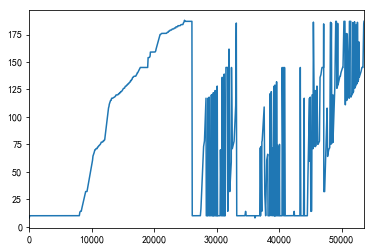

In [209]:
df["累计油耗"].plot()

# 生成时间序列

In [210]:
df["second"] = df.Time.apply(lambda x: time.mktime(x.timetuple()))
second_start = df.iloc[0].second
df["five_second"] = (df.second - second_start)  // 5

In [211]:
df

,time,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,Time,idx,last_notna_time,last_notna_time_diff,second,five_second
14,2019-07-22 22:06:34.34,62.0,0.0,8.030303,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:34,14,2019-07-22 22:06:34,2.0,1.563804e+09,0.0
15,2019-07-22 22:06:35.04,62.0,0.0,8.060606,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:35,15,2019-07-22 22:06:35,1.0,1.563804e+09,0.0
16,2019-07-22 22:06:36.28,62.0,0.0,8.090909,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:36,16,2019-07-22 22:06:36,1.0,1.563804e+09,0.0
17,2019-07-22 22:06:37.34,62.0,0.0,8.121212,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:37,17,2019-07-22 22:06:37,1.0,1.563804e+09,0.0
19,2019-07-22 22:06:39.26,62.0,0.0,8.181818,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:39,19,2019-07-22 22:06:39,2.0,1.563804e+09,1.0
21,2019-07-22 22:06:41.22,62.0,0.0,8.242424,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:41,21,2019-07-22 22:06:41,2.0,1.563804e+09,1.0
22,2019-07-22 22:06:42.30,62.0,0.0,8.272727,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:42,22,2019-07-22 22:06:42,1.0,1.563804e+09,1.0
23,2019-07-22 22:06:43.28,62.0,0.0,8.303030,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:43,23,2019-07-22 22:06:43,1.0,1.563804e+09,1.0
24,2019-07-22 22:06:44.32,62.0,0.0,8.333333,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:44,24,2019-07-22 22:06:44,1.0,1.563804e+09,2.0
25,2019-07-22 22:06:45.24,62.0,0.0,8.363636,0.0,0.0,0.0,0.02,0.0,2019-07-22 22:06:45,25,2019-07-22 22:06:45,1.0,1.563804e+09,2.0


In [212]:
df_mean = df.drop("time",axis=1).groupby("five_second").mean()

In [213]:
####泵车状态不能用均值，可能得出无意义的值，取最大值表示

In [214]:
df_mean["泵车状态"] = df[["泵车状态","five_second"]].groupby("five_second").max()

In [215]:
df_mean["泵车状态"].unique()

array([ 0.,  4.,  5.,  3.,  1., 12.,  6.,  7.,  9., 14., 11.,  2.])

In [216]:
df_mean

,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second
five_second,,,,,,,,,,,
0.0,62.000000,0.000000,8.075758,0.000000,0.000000,0.000000,0.020000,0.0,15.500000,1.250000,1.563804e+09
1.0,62.000000,0.000000,8.250000,0.000000,0.000000,0.000000,0.020000,0.0,21.250000,1.500000,1.563804e+09
2.0,62.000000,0.000000,8.378788,0.000000,0.000000,0.000000,0.020000,0.0,25.500000,1.000000,1.563804e+09
6568.0,38.000000,0.000000,8.745455,0.000000,0.000000,0.000000,0.020000,0.0,37.600000,6566.200000,1.563837e+09
6569.0,38.000000,0.000000,9.090909,0.000000,0.000000,0.000000,0.020000,0.0,49.000000,0.294118,1.563837e+09
6570.0,38.000000,0.000000,9.424242,0.000000,0.000000,0.000000,0.020000,0.0,60.000000,1.000000,1.563837e+09
6571.0,38.000000,0.000000,9.560606,0.000000,0.000000,0.000000,0.020000,0.0,64.500000,1.000000,1.563837e+09
6572.0,38.000000,0.000000,9.704545,0.000000,0.000000,0.000000,0.020000,0.0,69.250000,1.500000,1.563837e+09
6573.0,38.000000,0.000000,9.848485,0.000000,0.000000,0.000000,0.020000,0.0,74.000000,1.000000,1.563837e+09


In [217]:
start = df.iloc[0].second
end = df.iloc[-1].second
second_index = np.arange(start,end,5)

In [218]:
second_idx = pd.DataFrame({"second_idx":second_index})

In [219]:
len(second_idx)

68351

In [220]:
len(second_idx)/12/60/24  ###数据持续时间 天  2~3天正常

3.9554976851851857

In [221]:
new_df = second_idx.join(df_mean)

In [222]:
new_df = new_df.drop(["idx","last_notna_time_diff","second"],axis=1)

In [223]:
new_df["time"] = pd.to_datetime(new_df['second_idx'].values, unit='s',utc=True).tz_convert("Asia/Shanghai").tz_localize(None)

In [224]:
len(new_df[new_df["发动机转速"]>0])/12/60   ###发动机累积工作时间  5~6小时正常，太短则可能遇到数据传输缺失的问题

6.159722222222222

In [225]:
def hand_col_new(df,col ="发动机转速",n=240):
    
    ####计算col停顿时间
    df["last_notna_time"] = df[df[col].notna()].second_idx   ##当时不是na的时间
    df_notna_time = df[df[col].notna()].second_idx
    df_notna_time_diff = (df_notna_time - df_notna_time.shift(1))
    df["last_notna_time_diff"] = df_notna_time_diff
    df["last_notna_time_diff"] = df["last_notna_time_diff"].fillna(method = "bfill")
    
    df.loc[df["last_notna_time_diff"]> n,col] = df.loc[df["last_notna_time_diff"]> n,col].fillna(0)  #长时间na的填充0
    df[col] = df[col].fillna(method = "ffill")
#     df = df.drop(["last_notna_time","last_notna_time_diff"],axis=1)
    return df

In [226]:
new_df = hand_col_new(new_df,col ="发动机转速",n=240)
new_df = hand_col_new(new_df,col ="系统压力",n=240)
new_df = hand_col_new(new_df,col ="转向次数",n=240)
new_df = hand_col_new(new_df,col ="泵送排量",n=240)
new_df = hand_col_new(new_df,col ="泵车状态",n=240)


In [227]:
new_df["累计油耗"] = new_df["累计油耗"].fillna(method = "bfill")

In [228]:
new_df["累计时间"] = new_df["累计时间"].fillna(method = "bfill")

In [229]:
####液压油温继续插值补缺

In [230]:
new_df = new_df.reset_index()

In [231]:
df_notna_idx = new_df[new_df["液压油温"].notna()]["index"]

In [232]:
new_df = cz(new_df,df_notna_idx,col="液压油温")

In [39]:
new_df["液压油温"].describe([0.05,0.1])

count    68351.000000
mean        54.342948
std         13.472001
min         35.000000
5%          36.061712
10%         36.886544
50%         52.196692
max         88.000000
Name: 液压油温, dtype: float64

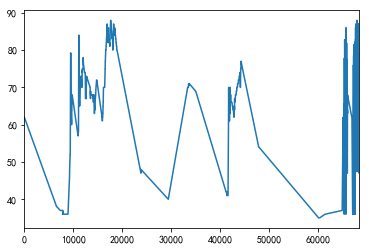

In [40]:
new_df["液压油温"].plot()

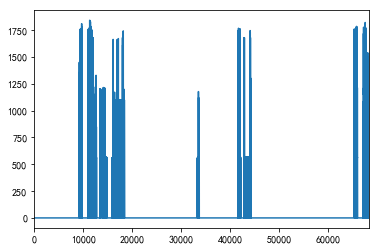

In [41]:
new_df["发动机转速"].plot()

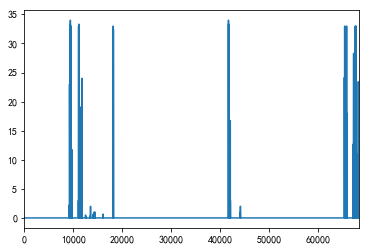

In [42]:
new_df["系统压力"].plot()

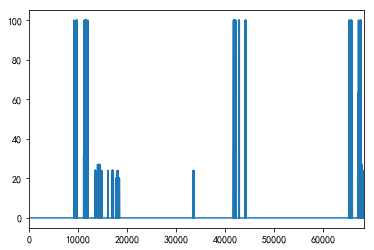

In [43]:
new_df["泵送排量"].plot()

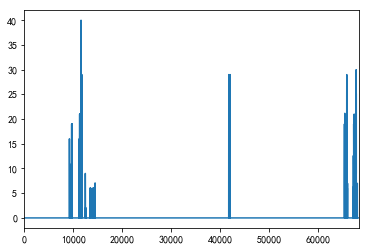

In [44]:
new_df["转向次数"].plot()

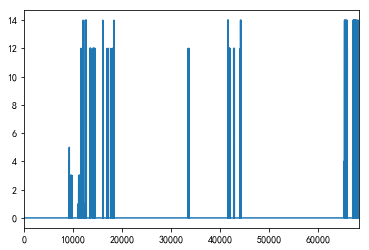

In [45]:
new_df["泵车状态"].plot()

# 过程划分

In [ ]:
##

In [234]:
def count_cut(df,col,t): ######间隔t个行视为分割开的次数
    df.loc[df[col]>0,"col_diff"] = df.loc[df[col]>0,"index"] - df.loc[df[col]>0,"index"].shift(1)
    df.loc[df[col]>0,"count_flag"] =df.loc[df[col]>0,"col_diff"].apply(lambda x: 1 if x>t else 0)
    df.loc[df[col]>0,col+"count"] =df.loc[df[col]>0,"count_flag"].cumsum()
    df = df.drop(["col_diff","count_flag"],axis=1)
    return df

In [235]:
new_df = count_cut(new_df,"转向次数",360)

In [236]:
new_df[new_df["转向次数count"]==1]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time,last_notna_time,last_notna_time_diff,转向次数count
11137,11137,1.563860e+09,81.250000,32.000000,36.426488,8.000000,1221.500000,3.000000,0.420000,3.0,2019-07-23 13:34:39,1.563860e+09,30.0,1.0
11138,11138,1.563860e+09,81.000000,32.000000,36.552509,8.000000,1216.750000,3.000000,0.420000,3.0,2019-07-23 13:34:44,1.563860e+09,5.0,1.0
11139,11139,1.563860e+09,80.000000,32.000000,36.662777,8.000000,1217.000000,3.000000,0.420000,3.0,2019-07-23 13:34:49,1.563860e+09,5.0,1.0
11140,11140,1.563860e+09,80.000000,32.000000,36.725788,8.000000,1212.000000,3.000000,0.420000,3.0,2019-07-23 13:34:54,1.563860e+09,5.0,1.0
11141,11141,1.563860e+09,80.000000,32.000000,36.820303,8.000000,1218.666667,2.000000,0.420000,3.0,2019-07-23 13:34:59,1.563860e+09,5.0,1.0
11142,11142,1.563860e+09,79.125000,32.000000,36.930572,8.000000,1215.000000,2.250000,0.420000,3.0,2019-07-23 13:35:04,1.563860e+09,5.0,1.0
11143,11143,1.563860e+09,79.000000,32.000000,37.040840,8.000000,1212.666667,3.000000,0.430000,3.0,2019-07-23 13:35:09,1.563860e+09,5.0,1.0
11144,11144,1.563860e+09,78.833333,32.000000,37.166861,8.000000,1212.666667,3.000000,0.430000,3.0,2019-07-23 13:35:14,NaN,30.0,1.0
11145,11145,1.563860e+09,78.666667,32.000000,37.166861,8.000000,1212.666667,3.000000,0.430000,3.0,2019-07-23 13:35:19,NaN,30.0,1.0
11146,11146,1.563860e+09,78.500000,32.000000,37.166861,8.000000,1212.666667,3.000000,0.430000,3.0,2019-07-23 13:35:24,NaN,30.0,1.0


In [237]:
new_df.loc[new_df["泵送排量"]>0,"col_diff"] = new_df.loc[new_df["泵送排量"]>0,"index"] - new_df.loc[new_df["泵送排量"]>0,"index"].shift(1)

In [238]:
new_df.loc[new_df["泵送排量"]>0,"count_flag"] =new_df.loc[new_df["泵送排量"]>0,"col_diff"].apply(lambda x: 1 if x>100 else 0)

In [239]:
new_df.loc[new_df["泵送排量"]>0,"count"] =new_df.loc[new_df["泵送排量"]>0,"count_flag"].cumsum()

In [240]:
new_df[new_df["泵送排量"]>0]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time,last_notna_time,last_notna_time_diff,转向次数count,col_diff,count_flag,count
9204,9204,1.563850e+09,45.000000,100.000000,13.010000,16.000000,1451.000000,2.000000,0.020000,4.0,2019-07-23 10:53:34,1.563850e+09,1450.0,0.0,NaN,0.0,0.0
9205,9205,1.563850e+09,45.000000,100.000000,13.045000,16.000000,1449.750000,2.250000,0.020000,4.0,2019-07-23 10:53:39,1.563850e+09,5.0,0.0,1.0,0.0,0.0
9206,9206,1.563850e+09,45.000000,100.000000,13.092000,12.800000,1382.800000,1.600000,0.020000,4.0,2019-07-23 10:53:44,1.563850e+09,5.0,0.0,1.0,0.0,0.0
9207,9207,1.563850e+09,45.000000,40.000000,13.150000,0.000000,486.200000,0.000000,0.020000,0.0,2019-07-23 10:53:49,1.563850e+09,5.0,NaN,1.0,0.0,0.0
9555,9555,1.563852e+09,67.000000,12.500000,23.384091,1.000000,1152.500000,0.750000,0.120000,3.0,2019-07-23 11:22:49,1.563852e+09,5.0,0.0,348.0,1.0,1.0
9556,9556,1.563852e+09,66.842105,12.500000,23.474242,1.000000,1152.500000,0.750000,0.150000,3.0,2019-07-23 11:22:54,NaN,95.0,0.0,1.0,0.0,1.0
9557,9557,1.563852e+09,66.684211,12.500000,23.474242,1.000000,1152.500000,0.750000,0.150000,3.0,2019-07-23 11:22:59,NaN,95.0,0.0,1.0,0.0,1.0
9558,9558,1.563852e+09,66.526316,12.500000,23.474242,1.000000,1152.500000,0.750000,0.150000,3.0,2019-07-23 11:23:04,NaN,95.0,0.0,1.0,0.0,1.0
9559,9559,1.563852e+09,66.368421,12.500000,23.474242,1.000000,1152.500000,0.750000,0.150000,3.0,2019-07-23 11:23:09,NaN,95.0,0.0,1.0,0.0,1.0
9560,9560,1.563852e+09,66.210526,12.500000,23.474242,1.000000,1152.500000,0.750000,0.150000,3.0,2019-07-23 11:23:14,NaN,95.0,0.0,1.0,0.0,1.0


# 划分开始

In [241]:
###系统憋压

In [242]:
new_df[new_df["泵车状态"] == 10]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time,last_notna_time,last_notna_time_diff,转向次数count,col_diff,count_flag,count


In [243]:
####退活塞,需不需要考虑退活塞保持？？？？code9

In [244]:
new_df[(new_df["泵车状态"] == 7)]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time,last_notna_time,last_notna_time_diff,转向次数count,col_diff,count_flag,count
11761,11761,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1442.500000,0.000000,1.200000,7.0,2019-07-23 14:26:39,1.563863e+09,30.0,NaN,NaN,NaN,NaN
11762,11762,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1718.000000,0.000000,1.200000,7.0,2019-07-23 14:26:44,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11763,11763,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1743.000000,0.666667,1.200000,7.0,2019-07-23 14:26:49,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11764,11764,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1745.000000,1.000000,1.200000,7.0,2019-07-23 14:26:54,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11765,11765,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1743.200000,1.000000,1.200000,7.0,2019-07-23 14:26:59,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11766,11766,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1745.600000,1.000000,1.200000,7.0,2019-07-23 14:27:04,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11767,11767,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1744.000000,1.000000,1.200000,7.0,2019-07-23 14:27:09,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11768,11768,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1742.250000,1.000000,1.200000,7.0,2019-07-23 14:27:14,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11769,11769,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1744.000000,0.000000,1.200000,7.0,2019-07-23 14:27:19,1.563863e+09,5.0,NaN,NaN,NaN,NaN
11770,11770,1.563863e+09,71.000000,0.000000,70.000000,0.000000,1746.250000,0.000000,1.200000,7.0,2019-07-23 14:27:24,1.563863e+09,5.0,NaN,NaN,NaN,NaN


In [245]:
####高低压打泵,5+5+10，各20min，约240个时间单位

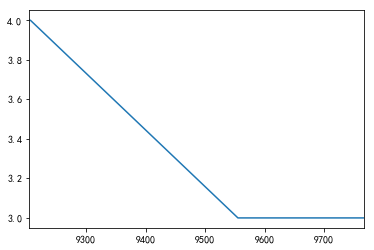

In [246]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)]["泵车状态"].plot()

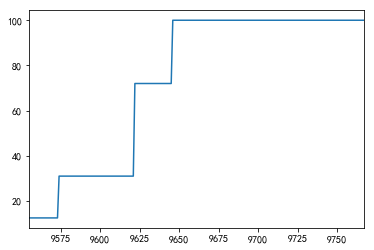

In [247]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["泵送排量"].plot()

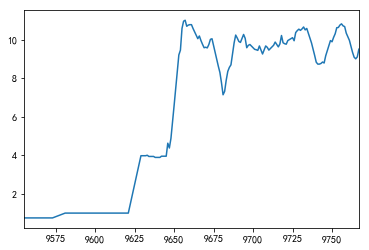

In [248]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["系统压力"].rolling(8,min_periods =1).mean().plot()

In [249]:
pd.set_option("max_rows",500)

In [250]:
tmp = new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["系统压力"].rolling(8,min_periods =1).mean()

In [ ]:
####下面的方法不对

In [273]:
tmp_diff = tmp-tmp.shift(6)

In [265]:
len(tmp)

213

In [253]:
tmp_diff2 = tmp-tmp.shift(-140)

In [254]:
tmp_diff2.describe()

count    73.000000
mean     -8.767066
std       0.761591
min      -9.812500
25%      -9.300000
50%      -8.908333
75%      -8.687500
max      -6.250000
Name: 系统压力, dtype: float64

In [256]:
start_idx = tmp_diff2[tmp_diff2<-2].index[0]    ######开始点

In [257]:
def count_series(s,t):
    df = s.reset_index()
    df["idx_diff"] = df["index"] - df["index"].shift(1)
    df["count_flag"] =df["idx_diff"].apply(lambda x: 1 if x>t else 0)
    df["count"] =df["count_flag"].cumsum()
    df = df.drop(["idx_diff","count_flag"],axis=1)
    return df

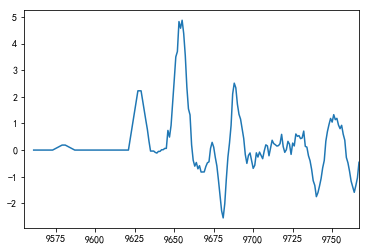

In [274]:
tmp_diff.plot()

In [275]:
tmp_diff[tmp_diff>4]

9653    4.825
9654    4.575
9655    4.875
9656    4.375
Name: 系统压力, dtype: float64

In [276]:
cut_count = count_series(tmp_diff[tmp_diff>4],t=36)

In [277]:
cut_count

,index,系统压力,count
0,9653,4.825,0
1,9654,4.575,0
2,9655,4.875,0
3,9656,4.375,0


In [278]:
cut_idx1 = int(cut_count[cut_count["count"]==0].iloc[0]["index"])    ######第一段打泵结束

In [279]:
cut_idx1

9653

In [280]:
cut_idx2 = int(cut_count[cut_count["count"]==1].iloc[0]["index"])  ######第二段打泵结束

IndexError: single positional indexer is out-of-bounds

In [177]:
cut_idx2

23247

In [281]:
new_df.loc[start_idx:cut_idx1]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time,last_notna_time,last_notna_time_diff,转向次数count,col_diff,count_flag,count
9555,9555,1.563852e+09,67.000000,12.5,23.384091,1.0,1152.500000,0.75,0.12,3.0,2019-07-23 11:22:49,1.563852e+09,5.0,0.0,348.0,1.0,1.0
9556,9556,1.563852e+09,66.842105,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:22:54,NaN,95.0,0.0,1.0,0.0,1.0
9557,9557,1.563852e+09,66.684211,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:22:59,NaN,95.0,0.0,1.0,0.0,1.0
9558,9558,1.563852e+09,66.526316,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:23:04,NaN,95.0,0.0,1.0,0.0,1.0
9559,9559,1.563852e+09,66.368421,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:23:09,NaN,95.0,0.0,1.0,0.0,1.0
9560,9560,1.563852e+09,66.210526,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:23:14,NaN,95.0,0.0,1.0,0.0,1.0
9561,9561,1.563852e+09,66.052632,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:23:19,NaN,95.0,0.0,1.0,0.0,1.0
9562,9562,1.563852e+09,65.894737,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:23:24,NaN,95.0,0.0,1.0,0.0,1.0
9563,9563,1.563852e+09,65.736842,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:23:29,NaN,95.0,0.0,1.0,0.0,1.0
9564,9564,1.563852e+09,65.578947,12.5,23.474242,1.0,1152.500000,0.75,0.15,3.0,2019-07-23 11:23:34,NaN,95.0,0.0,1.0,0.0,1.0


In [154]:
pd.DataFrame(tmp_diff[tmp_diff<-5])

,系统压力
22877,-5.343750
22878,-6.718750
22879,-6.543750
22880,-7.018750
22881,-7.400000
22886,-5.775000
23248,-5.369697


In [ ]:
new_df.loc[start_idx]

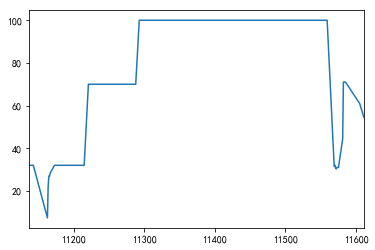

In [64]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==1)&(new_df["泵车状态"] == 3)]["泵送排量"].plot()

In [63]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)][["time","泵送排量"]]

,time,泵送排量
9555,2019-07-23 11:22:49,12.5
9574,2019-07-23 11:24:24,31.0
9598,2019-07-23 11:26:24,31.0
9622,2019-07-23 11:28:24,72.0
9623,2019-07-23 11:28:29,72.0
9624,2019-07-23 11:28:34,72.0
9625,2019-07-23 11:28:39,72.0
9626,2019-07-23 11:28:44,72.0
9627,2019-07-23 11:28:49,72.0
9634,2019-07-23 11:29:24,72.0


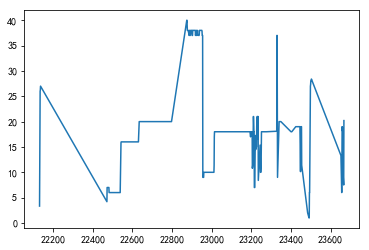

In [146]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["转向次数"].plot()

In [51]:
new_df[(new_df["泵车状态"] == 1)|(new_df["泵车状态"] == 2)|(new_df["泵车状态"] == 3)|(new_df["泵车状态"] == 4)]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second
22130,22130,1.564359e+09,49.000000,80.000000,11.014563,0.000000,1279.500000,0.000000,0.000,3.0,2372.500000,12.500000,1.564359e+09
22131,22131,1.564359e+09,49.000000,80.000000,11.038835,3.333333,1346.666667,1.000000,0.000,3.0,2375.000000,1.000000,1.564359e+09
22132,22132,1.564359e+09,49.500000,80.000000,11.072816,10.000000,1447.500000,1.250000,0.000,3.0,2378.500000,1.500000,1.564359e+09
22133,22133,1.564359e+09,48.700000,100.000000,11.116505,20.400000,1557.200000,2.200000,0.000,3.0,2383.000000,1.200000,1.564359e+09
22134,22134,1.564359e+09,48.000000,100.000000,11.165049,26.000000,1655.600000,2.800000,0.000,3.0,2388.000000,1.000000,1.564359e+09
22135,22135,1.564359e+09,47.250000,100.000000,11.208738,26.250000,1690.500000,2.250000,0.000,3.0,2392.500000,1.250000,1.564359e+09
22136,22136,1.564359e+09,47.000000,100.000000,11.237864,27.000000,1713.500000,5.000000,0.000,3.0,2395.500000,0.500000,1.564359e+09
22137,22137,1.564359e+09,47.000000,100.000000,11.286408,23.750000,1702.125000,1.875000,0.000,4.0,2400.500000,1.125000,1.564359e+09
22138,22138,1.564359e+09,47.000000,100.000000,11.330097,0.000000,1185.000000,0.000000,0.000,4.0,2405.000000,1.000000,1.564359e+09
22310,22310,1.564360e+09,82.000000,0.000000,17.241830,0.000000,1359.000000,0.000000,0.000,1.0,2875.000000,25.000000,1.564360e+09


In [ ]:
####支腿臂架调试

In [50]:
new_df[(new_df["泵车状态"] == 14)|(new_df["泵车状态"] == 12)]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second
14345,14345,1.564320e+09,38.000000,0.0,3.000000,0.0,1206.500000,0.0,0.00,14.0,675.500000,11816.250000,1.564320e+09
14346,14346,1.564320e+09,38.666667,0.0,3.000000,0.0,1205.666667,0.0,0.00,14.0,679.000000,1.666667,1.564320e+09
14347,14347,1.564320e+09,39.000000,0.0,3.000000,0.0,830.250000,0.0,0.00,14.0,682.500000,1.500000,1.564320e+09
14381,14381,1.564321e+09,41.000000,0.0,3.000000,0.0,1625.250000,0.0,0.00,12.0,720.500000,22.750000,1.564321e+09
14382,14382,1.564321e+09,41.083333,0.0,3.000000,0.0,1651.750000,0.0,0.00,12.0,724.500000,2.250000,1.564321e+09
14383,14383,1.564321e+09,41.888889,0.0,3.000000,0.0,1589.333333,0.0,0.00,12.0,728.000000,2.000000,1.564321e+09
14384,14384,1.564321e+09,42.000000,0.0,3.000000,0.0,1556.750000,0.0,0.00,12.0,731.500000,1.500000,1.564321e+09
14385,14385,1.564321e+09,42.000000,0.0,3.000000,0.0,1531.666667,0.0,0.00,12.0,735.000000,2.000000,1.564321e+09
14386,14386,1.564321e+09,42.333333,0.0,3.000000,0.0,1540.666667,0.0,0.00,12.0,738.000000,1.000000,1.564321e+09
14393,14393,1.564321e+09,44.000000,0.0,3.000000,0.0,1050.000000,0.0,0.00,12.0,740.000000,33.000000,1.564321e+09


In [53]:
####交检洗车

In [ ]:
###确定泵送完毕时间
